In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load in and clean the data
text_file = open("medicare_data.txt", "r")
data = text_file.read()
text_file.close()

data = data.replace('$','').replace('Part B ','').replace('Part D ','').replace(' ',',').replace('\n\n','\n')


csv_file = open("medicare_data.csv", "w+")
csv_file.write(data)
csv_file.close()


csv_file = np.genfromtxt("medicare_data.csv",
                 delimiter=",")

result = [[],[],[]]

for i in range( int( 45/3) ):
    #pad with nans
    for j in range(3):
        row = csv_file[i*3+j].copy()
        back_nans = 45/3 - i
        front_nans = i
        row = np.append( row, np.repeat(np.nan, back_nans) )
        row = np.append(np.repeat(np.nan, front_nans),row )
        result[j].append(row)

part_a = np.array(result[0])
part_b = np.array(result[1])
part_d = np.array(result[2])

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033]


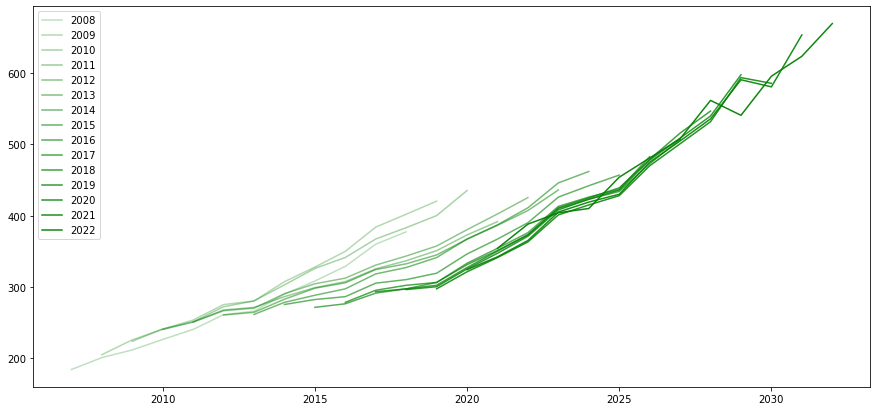

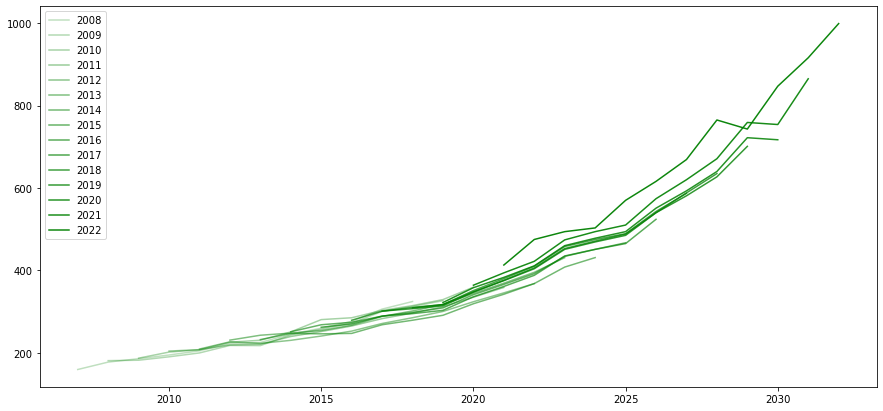

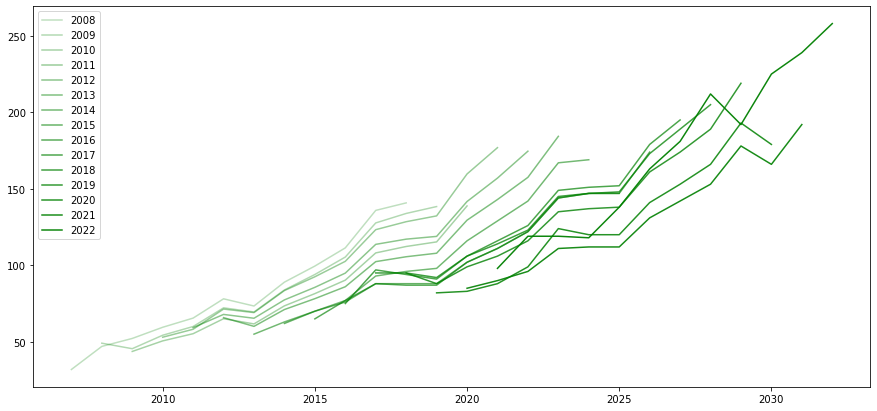

In [3]:
#plot predictions over time using a gradient
labels = ['part a','part b', 'part c']
x_axis = [2007 + i for i in range( int(45/3) + 12) ]
print(x_axis)
v
for i in range(3):
    plt.figure(figsize=(15,7))
    part =  np.array(result[i])
    for row in range(part.shape[0]):
        offset = 5
        plt.plot(x_axis,part[row],color = 'green', alpha = (row+offset)/(part.shape[0]+offset),label=str(2008 + row) )
        
    plt.legend()
    plt.show()

In [12]:
#check correlation with ma over time
forecasts = np.genfromtxt('ma_predictions.csv', delimiter=',')

#one year ahead informativeness
window = np.flip(forecasts,axis=0)
window = window[0:-3,1:]



print( (true[:-1] - true[1:]).mean())

print(true)

print(window)

-16.007692307692306
[ 55.9  77.   92.8 109.  115.  131.9 123.  145.  156.  170.  200.  206.
 210.  264. ]
[[ 55.9  75.4  90.8 105.8 117.5 139.9 127.9 149.6 157.8 167.4 195.5 193.8
    nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan]
 [  nan  77.   94.1 112.8 130.6 159.7 145.8 174.1 185.  196.3 228.5 225.9
  221.2   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan]
 [  nan   nan  92.8 110.2 122.1 137.5 122.7 142.3 155.4 162.3 184.3 180.4
  175.4 204.3   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan]
 [  nan   nan   nan 109.  116.2 122.4 101.5 105.9  99.7  89.3  91.6  84.
   79.7  93.6 100.9   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan]
 [  nan   nan   nan   nan 115.  129.1 114.6 118.8 111.9 100.4  97.1  85.4
   79.2  92.6 100.7 108.4   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan]
 [  nan   nan   nan   nan   nan 131.9 122.1 140.  

(14, 27)
(15, 27)


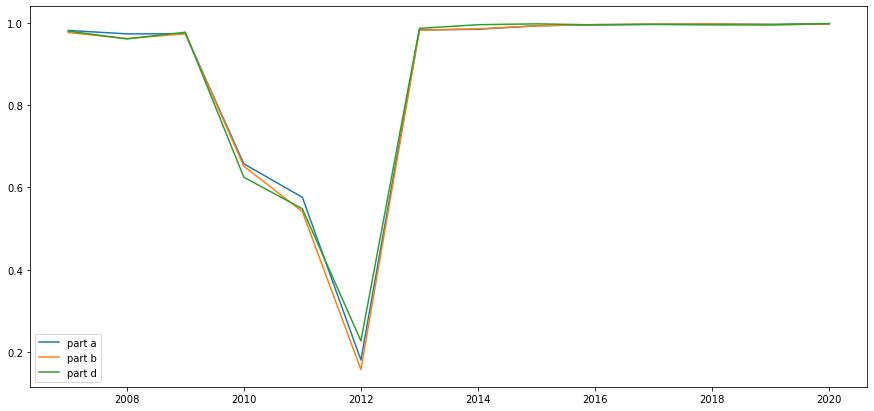

In [5]:


print(window.shape)
print(part_a.shape)
labels = ['part a','part b', 'part d']

plt.figure(figsize=(15,7))
for i in range(3):
    
    part =  np.array(result[i])
    corrs = []
    for j in range(14):
        front_nan = j
        back_nan = 27 - 15 + j
        cov = np.cov(part[j,front_nan:back_nan], window[j,front_nan:back_nan])
        corr = np.sqrt( cov[0,1]**2/(cov[0,0]*cov[1,1]) )
        corrs.append(corr)
        #print(part[j,front_nan:back_nan], window[j,front_nan:back_nan])
        #print('--')
    plt.plot([k+2007 for k in range( len( corrs)  )],corrs,label =labels[i] )
    #break
plt.legend()
plt.show()


In [6]:
for i in range(3):
    part =  np.array(result[i])
    true_medi = np.diagonal(part)[:-1]
    true_ma = np.diagonal(window)
    cov = np.cov(true_medi,true_ma)
    corr = np.sqrt( cov[0,1]**2/(cov[0,0]*cov[1,1]) )
    print(corr)

0.9641025077689913
0.9958202663945024
0.9177972124870997
